In [94]:
import os
import json

from spacy.lang.de import German

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
#Visualisierung
import pyLDAvis.gensim_models
import pyLDAvis

import pandas as pd
import seaborn as sns

from collections import Counter

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
folder = os.path.join('data','REFINED','ndr')

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
parser = German()

def tokenize(text): 
    # tokenize
    tokens = []
    t = parser(text)
    for token in t:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            tokens.append('URL')
        else:
            tokens.append(token.lower_)
    return tokens


def lemmatize(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def return_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('german'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop]
    tokens = [lemmatize(token) for token in tokens]
    return tokens

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
def iteratefiles(filepath):
    list_dir = os.listdir(filepath)
    data = []
    for item in list_dir:
        with open(os.path.join(folder,item),"r",encoding='utf-8') as f:
            res = f.read() 
        dict = json.loads(res)
        content = dict['content'].values()
        c = ''
        for l in content: 
            c += l[1]
        content = c
        tokens = prepare_text_for_lda(content)
        data.append(tokens)
    return data, list_dir
    

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
data, list_dir = iteratefiles(folder)

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# Normales LDA
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(token) for token in data]
num_topics = 11

ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=num_topics,id2word=dictionary,passes=15)
ldamodel.save('model5.gensim')

for idx, topic in ldamodel.print_topics(-1,num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, topic))    

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.010*"schon" + 0.010*"virus" + 0.009*"patienten" + 0.008*"sagen" + 0.008*"immer" + 0.007*"einfach" + 0.007*"beispiel" + 0.007*"natürlich" + 0.005*"genau" + 0.005*"eigentlich"
Topic: 1 
Words: 0.007*"studie" + 0.006*"patienten" + 0.005*"schon" + 0.004*"fälle" + 0.004*"sagen" + 0.004*"wurde" + 0.003*"risiko" + 0.003*"deutschland" + 0.003*"blutgruppe" + 0.003*"wirklich"
Topic: 2 
Words: 0.006*"schon" + 0.004*"daten" + 0.004*"beispiel" + 0.004*"natürlich" + 0.003*"menschen" + 0.003*"viele" + 0.003*"einfach" + 0.002*"heißt" + 0.002*"datenspende" + 0.002*"fieber"
Topic: 3 
Words: 0.013*"schon" + 0.010*"sagen" + 0.010*"virus" + 0.007*"vielleicht" + 0.007*"immer" + 0.006*"studie" + 0.005*"einfach" + 0.005*"patienten" + 0.005*"genau" + 0.005*"beispiel"
Topic: 4 
Words: 0.013*"schon" + 0.011*"sagen" + 0.007*"virus" + 0.006*"vielleicht" + 0.006*"immer" + 0.006*"einfach" + 0.006*"natürlich" + 0.006*"beispiel" + 0.006*"prozent" + 0.005*"müssen"
Topic: 5 
Words: 0.011*"schon" + 0.0

In [100]:
# TF-IDF und LDA
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

ldamodel_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=num_topics,id2word=dictionary,passes=15)
ldamodel_tfidf.save('model6.gensim')

for idx, topic in ldamodel_tfidf.print_topics(-1,num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, topic))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.000*"erkrankungsbeginn" + 0.000*"eintrocknung" + 0.000*"situationsbericht" + 0.000*"niedergelassene" + 0.000*"korea" + 0.000*"bcg-impfung" + 0.000*"umgangsweisen" + 0.000*"besorgt" + 0.000*"abteilung" + 0.000*"labordiagnostik"
Topic: 1 
Words: 0.000*"12.03.2020" + 0.000*"ndr.de" + 0.000*"coronaupdate" + 0.000*"testsituation" + 0.000*"peripherie" + 0.000*"lösen" + 0.000*"antigen-tests" + 0.000*"6stand" + 0.000*"mütter" + 0.000*"quartal"
Topic: 2 
Words: 0.000*"blutgruppe" + 0.000*"chloroquin" + 0.000*"behandelten" + 0.000*"favipiravir" + 0.000*"protease" + 0.000*"rna-polymerase" + 0.000*"abgeschrieben" + 0.000*"enzym" + 0.000*"wirtschaft" + 0.000*"kawasaki-syndrom"
Topic: 3 
Words: 0.000*"henning" + 0.000*"datenspende" + 0.000*"nachbarschaft" + 0.000*"w-förmige" + 0.000*"wiederholt" + 0.000*"indikator" + 0.000*"gestartet" + 0.000*"handy" + 0.000*"inzidenzkurve" + 0.000*"zeitungsmeldungen"
Topic: 4 
Words: 0.000*"09.03.2020" + 0.000*"ndr.de" + 0.000*"coronaupdate" + 0.

Gütekriterien schaffen:
The LDA model (lda_model) we have created above can be used to compute the model’s perplexity, i.e. how good the model is. The lower the score the better the model will be. It can be done with the help of following script

In [101]:

print('\nPerplexity TF-IDF: ', ldamodel_tfidf.log_perplexity(corpus))
print('\nPerplexity : ', ldamodel.log_perplexity(corpus))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity TF-IDF:  -14.031713861988287

Perplexity :  -8.604692279523523


The LDA model (lda_model) we have created above can be used to compute the model’s coherence score i.e. the average /median of the pairwise word-similarity scores of the words in the topic. It can be done with the help of following script
https://radimrehurek.com/gensim_3.8.3/models/coherencemodel.html

In [85]:
# Vergleich Coherence in Relation zu Topic-Anzahl
coherence = []
min_topics = 10
max_topics = 50
for k in range(min_topics,max_topics):
    print('Round: '+str(k))
    ldamodel_coherence = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=k,id2word = dictionary, passes=15,)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel_coherence, texts=data,dictionary=dictionary, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))



C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\gensim\models\ldamodel.py:849: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.5302202147812611, 0.5389872304417767, 0.5226724277695111, 0.5176107870636819, 0.5180019716976775, 0.4610434583070188, 0.503683220176216, 0.4855594749432849, 0.49324031909003274, 0.483317625070684, 0.49987562504652266, 0.4730009677006781, 0.48917218087048187, 0.4993788032237857, 0.44983385306722545, 0.4741187502413436, 0.48176947812435417, 0.49063707230872233, 0.48272070970302267, 0.5036304237039831, 0.4692506595439615, 0.46555420284431703, 0.45843702244129214, 0.47687589637463507, 0.4776233170861591, 0.4692955107336645, 0.5070436133207031, 0.4737411123671408, 0.4555752031912829, 0.4654444296983289, 0.4526330507701464, 0.4891024861480138, 0.4607778228559451, 0.4771606217812309, 0.4819968861711201, 0.460983322444271, 0.4674882537250801, 0.4783407036054504, 0.4756422787625629, 0.45745852485632554]


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


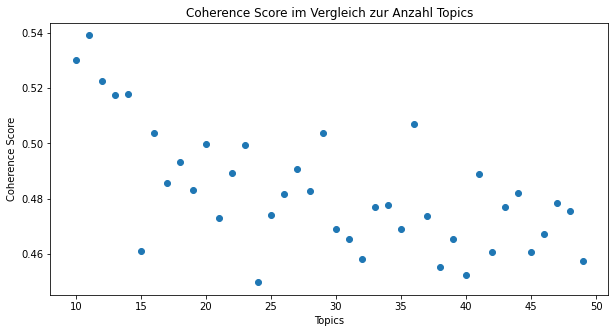

In [93]:
n_topics = []
score = []
for i in range(0,len(coherence)):
    n_topics.append(coherence[i][0])
    score.append(coherence[i][1])

print(n_topics)
print(score)

fig = plt.figure(figsize = (10, 5))

plt.plot(n_topics,score,'o')
plt.xlabel("Topics")
# plt.xlim(min_topics,max_topics)
plt.ylabel("Coherence Score")
plt.title("Coherence Score im Vergleich zur Anzahl Topics")
plt.show()

In [89]:
print(coherence)

[(10, 0.5302202147812611), (11, 0.5389872304417767), (12, 0.5226724277695111), (13, 0.5176107870636819), (14, 0.5180019716976775), (15, 0.4610434583070188), (16, 0.503683220176216), (17, 0.4855594749432849), (18, 0.49324031909003274), (19, 0.483317625070684), (20, 0.49987562504652266), (21, 0.4730009677006781), (22, 0.48917218087048187), (23, 0.4993788032237857), (24, 0.44983385306722545), (25, 0.4741187502413436), (26, 0.48176947812435417), (27, 0.49063707230872233), (28, 0.48272070970302267), (29, 0.5036304237039831), (30, 0.4692506595439615), (31, 0.46555420284431703), (32, 0.45843702244129214), (33, 0.47687589637463507), (34, 0.4776233170861591), (35, 0.4692955107336645), (36, 0.5070436133207031), (37, 0.4737411123671408), (38, 0.4555752031912829), (39, 0.4654444296983289), (40, 0.4526330507701464), (41, 0.4891024861480138), (42, 0.4607778228559451), (43, 0.4771606217812309), (44, 0.4819968861711201), (45, 0.460983322444271), (46, 0.4674882537250801), (47, 0.4783407036054504), (48,

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
#tf-idf
coherence_model_lda = CoherenceModel(
   model=ldamodel_tfidf, texts=data, dictionary=dictionary,coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score TF-IDF: ', coherence_lda)
# sans
coherence_model_lda = CoherenceModel(
   model=ldamodel, texts=data, dictionary=dictionary,coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score : ', coherence_lda)

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score TF-IDF:  0.5184066335039993

Coherence Score :  0.23505837426675666


In [117]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.save_html(vis,"ldavis.html")
vis


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.065918 -0.031239       1        1  21.834660
5     -0.103248  0.099750       2        1  14.702527
3     -0.074154 -0.035575       3        1  13.550030
7     -0.067894 -0.037063       4        1  13.220873
0     -0.066711  0.029069       5        1  11.961543
10    -0.051619 -0.027315       6        1  10.376518
8     -0.044497  0.002791       7        1   6.524199
6     -0.027352 -0.054555       8        1   5.517817
1      0.085567  0.087270       9        1   1.582549
2      0.162561 -0.034954      10        1   0.726361
9      0.253267  0.001822      11        1   0.002921, topic_info=            Term         Freq        Total Category  logprob  loglift
891        virus  2378.000000  2378.000000  Default  30.0000  30.0000
717        schon  3374.000000  3374.000000  Default  29.0000  29.0000
1491      studie  1246.000000  1246.000000  Default  28.0000  28.0000
649    patienten  1339.000000  1339.000000  Default  27.0000  27.0000
149        daten   698.000000   698.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1043  antikörper     0.000520   686.645653  Topic11  -9.6421  -3.6522
312       gerade     0.000536   931.377399  Topic11  -9.6128  -3.9278
888        viren     0.000485   426.611010  Topic11  -9.7125  -3.2467
484        kommt     0.000509   743.734480  Topic11  -9.6643  -3.7542
595       müssen     0.000515  1045.742157  Topic11  -9.6520  -4.0827

[921 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
31008      6  0.950912       09.03.2020
2047       1  0.928616       12.03.2020
9951       6  0.878800         270-fach
14909      1  0.181129          500.000
14909      2  0.181129          500.000
...      ...       ...              ...
22897      8  0.739978  zytokin-antwort
9627       3  0.137938           öffnet
9627       4  0.827625           öffnet
27347      7  0.724791        östrogene
9037      10  0.519152       überzeugen

[2064 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 8, 1, 11, 9, 7, 2, 3, 10])

In [125]:
vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary)
# pyLDAvis.save_html(vis_tfidf,os.path.join("data","STATS","vis.html"))
vis_tfidf

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
6      0.032640  1.598756e-07       1        1  90.801435
10    -0.003380 -3.976755e-04       2        1   1.352042
3     -0.003523  2.104378e-04       3        1   1.176639
2     -0.003124  9.294207e-05       4        1   1.057158
7     -0.003428  7.253203e-05       5        1   0.968682
8     -0.003215  1.146130e-05       6        1   0.823057
5     -0.003206 -3.767680e-06       7        1   0.764198
9     -0.003179  3.872212e-06       8        1   0.764197
4     -0.003205  3.154288e-06       9        1   0.764197
1     -0.003196  3.303725e-06      10        1   0.764197
0     -0.003184  3.579934e-06      11        1   0.764197, topic_info=                   Term      Freq     Total Category  logprob  loglift
1942           substanz  0.000000  0.000000  Default  30.0000  30.0000
455             italien  0.000000  0.000000  Default  29.0000  29.0000
14747           mutante  0.000000  0.000000  Default  28.0000  28.0000
4894         mutationen  0.000000  0.000000  Default  27.0000  27.0000
11661            indien  0.000000  0.000000  Default  26.0000  26.0000
...                 ...       ...       ...      ...      ...      ...
1043         antikörper  0.000607  1.223384  Topic11 -10.3368  -2.7351
1444           schicken  0.000606  0.221659  Topic11 -10.3378  -1.0279
1282    inkubationszeit  0.000605  0.295529  Topic11 -10.3388  -1.3165
1136        empfindlich  0.000604  0.301804  Topic11 -10.3406  -1.3393
5593   niedergelassenen  0.000604  0.283501  Topic11 -10.3408  -1.2769

[590 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
3354       1  1.892277  antigentests
1043       1  0.817405    antikörper
21399      1  1.920616   astrazeneca
23548      1  1.409924       b.1.1.7
135        1  1.623089       cluster
3439       1  1.197388         dosis
1699       1  1.406668       england
236        1  1.613502   erwachsenen
269        1  1.653188          frau
7553       1  0.940112       geimpft
1269       1  1.282075        impfen
3567       1  0.940134     impfstoff
1778       1  1.472780    impfstoffe
1271       1  1.245179       impfung
11661      1  1.789728        indien
8835       1  1.664552      inzidenz
11668      1  1.958169        israel
455        1  1.422892       italien
475        1  0.895451          kind
1803       1  1.434394       kindern
1330       1  1.810651      lockdown
1335       1  1.795794         lunge
3621       1  1.559691         maske
3622       1  1.555196        masken
1841       1  1.548496    medikament
14747      1  1.270542       mutante
4893       1  1.284960      mutation
4894       1  1.449581    mutationen
665        1  1.802998       prozent
720        1  1.372657       schulen
1942       1  1.761151      substanz
17338      1  1.808868     südafrika
3726       1  1.224603      t-zellen
6384       1  1.054825      variante
4259       1  1.685706     varianten
5964       1  1.308011     viruslast
3788       1  1.766137         zelle
3789       1  1.824093        zellen, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 11, 4, 3, 8, 9, 6, 10, 5, 2, 1])

In [119]:
def topic_relevance_per_doc(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list  
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = topic_relevance_per_doc(ldamodel=ldamodel_tfidf, corpus=corpus_tfidf, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.to_csv(os.path.join("data","STATS","dominant_topics.csv"))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1883, 1416, 1396, 1563, 1385, 1390, 2150, 2209, 2045, 1614, 1817, 1591, 1732, 2323, 2280, 1552, 171, 1705, 2172, 1508, 1651, 267, 1722, 2123, 2435, 2259, 2345, 2457, 2263, 2383, 1949, 2244, 2746, 1493, 2946, 2648, 2419, 2840, 3026, 2032, 2819, 2676, 2424, 3044, 1523, 2647, 5374, 2695, 3903, 4023, 3721, 3913, 1599, 3266, 3399, 4371, 4723, 4263, 4856, 4694, 3933, 6455, 4646, 1759, 6284, 5367, 4074, 5112, 4849, 4552, 5354, 4544, 4982, 4378, 1761, 5223, 4309, 3240, 4692, 5565, 3767, 5736, 5332, 5236, 4150, 1524, 3524, 5801]


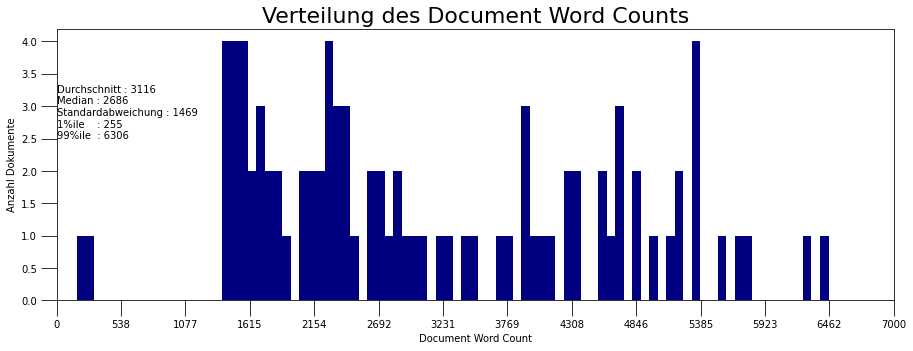

In [137]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
print(doc_lens)
bins = len(list_dir)
# Plot
plt.figure(figsize=(15,5))
plt.hist(doc_lens, bins = bins, color='navy')
plt.text(5,2.5,"Durchschnitt : "+str(round(np.mean(doc_lens)))+"\nMedian : "+str(round(np.median(doc_lens)))+"\nStandardabweichung : "+str(round(np.std(doc_lens)))+"\n1%ile    : "+str(round(np.quantile(doc_lens, q=0.01)))+"\n99%ile  : "+str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 50), ylabel='Anzahl Dokumente', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,7000,14))
plt.title('Verteilung des Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


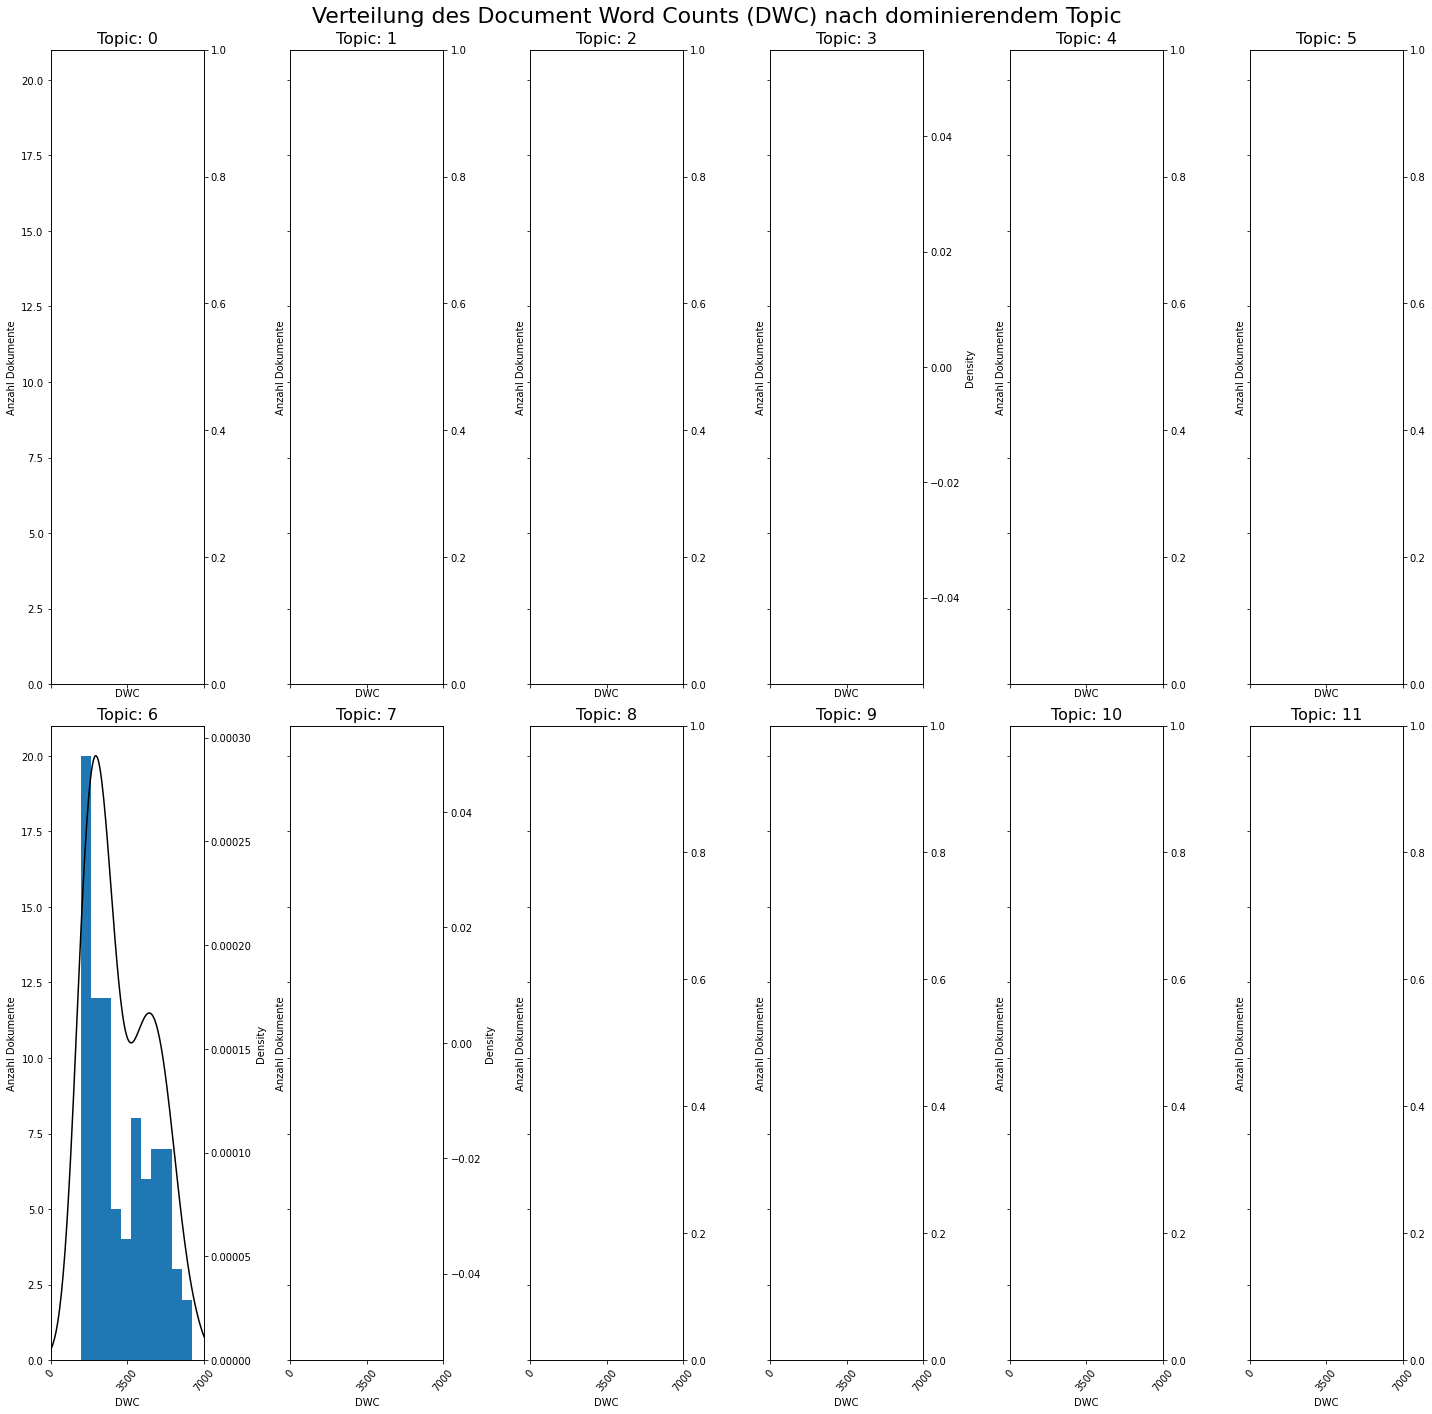

In [127]:
fig, axes = plt.subplots(2,6,figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 11) 
    ax.tick_params(axis='y')
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx(),warn_singular=False)
    ax.set(xlim=(0, 7000), xlabel='DWC')
    ax.set_ylabel('Anzahl Dokumente')
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16))
    ax.tick_params(axis="x",rotation=50)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.xticks(np.linspace(0,7000,3))
fig.suptitle('Verteilung des Document Word Counts (DWC) nach dominierendem Topic', fontsize=22)
plt.show()

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                  word  topic_id  importance  word_count
0    erkrankungsbeginn         0    0.000034           8
1         eintrocknung         0    0.000033           3
2    situationsbericht         0    0.000033           9
3      niedergelassene         0    0.000033           8
4                korea         0    0.000033          12
..                 ...       ...         ...         ...
105            heparin        10    0.000161          40
106     autoantikörper        10    0.000148          41
107            aspirin        10    0.000141          24
108             thomas        10    0.000128          29
109          budesonid        10    0.000119          12

[110 rows x 4 columns]


<ipython-input-139-8f5d00ea799f>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


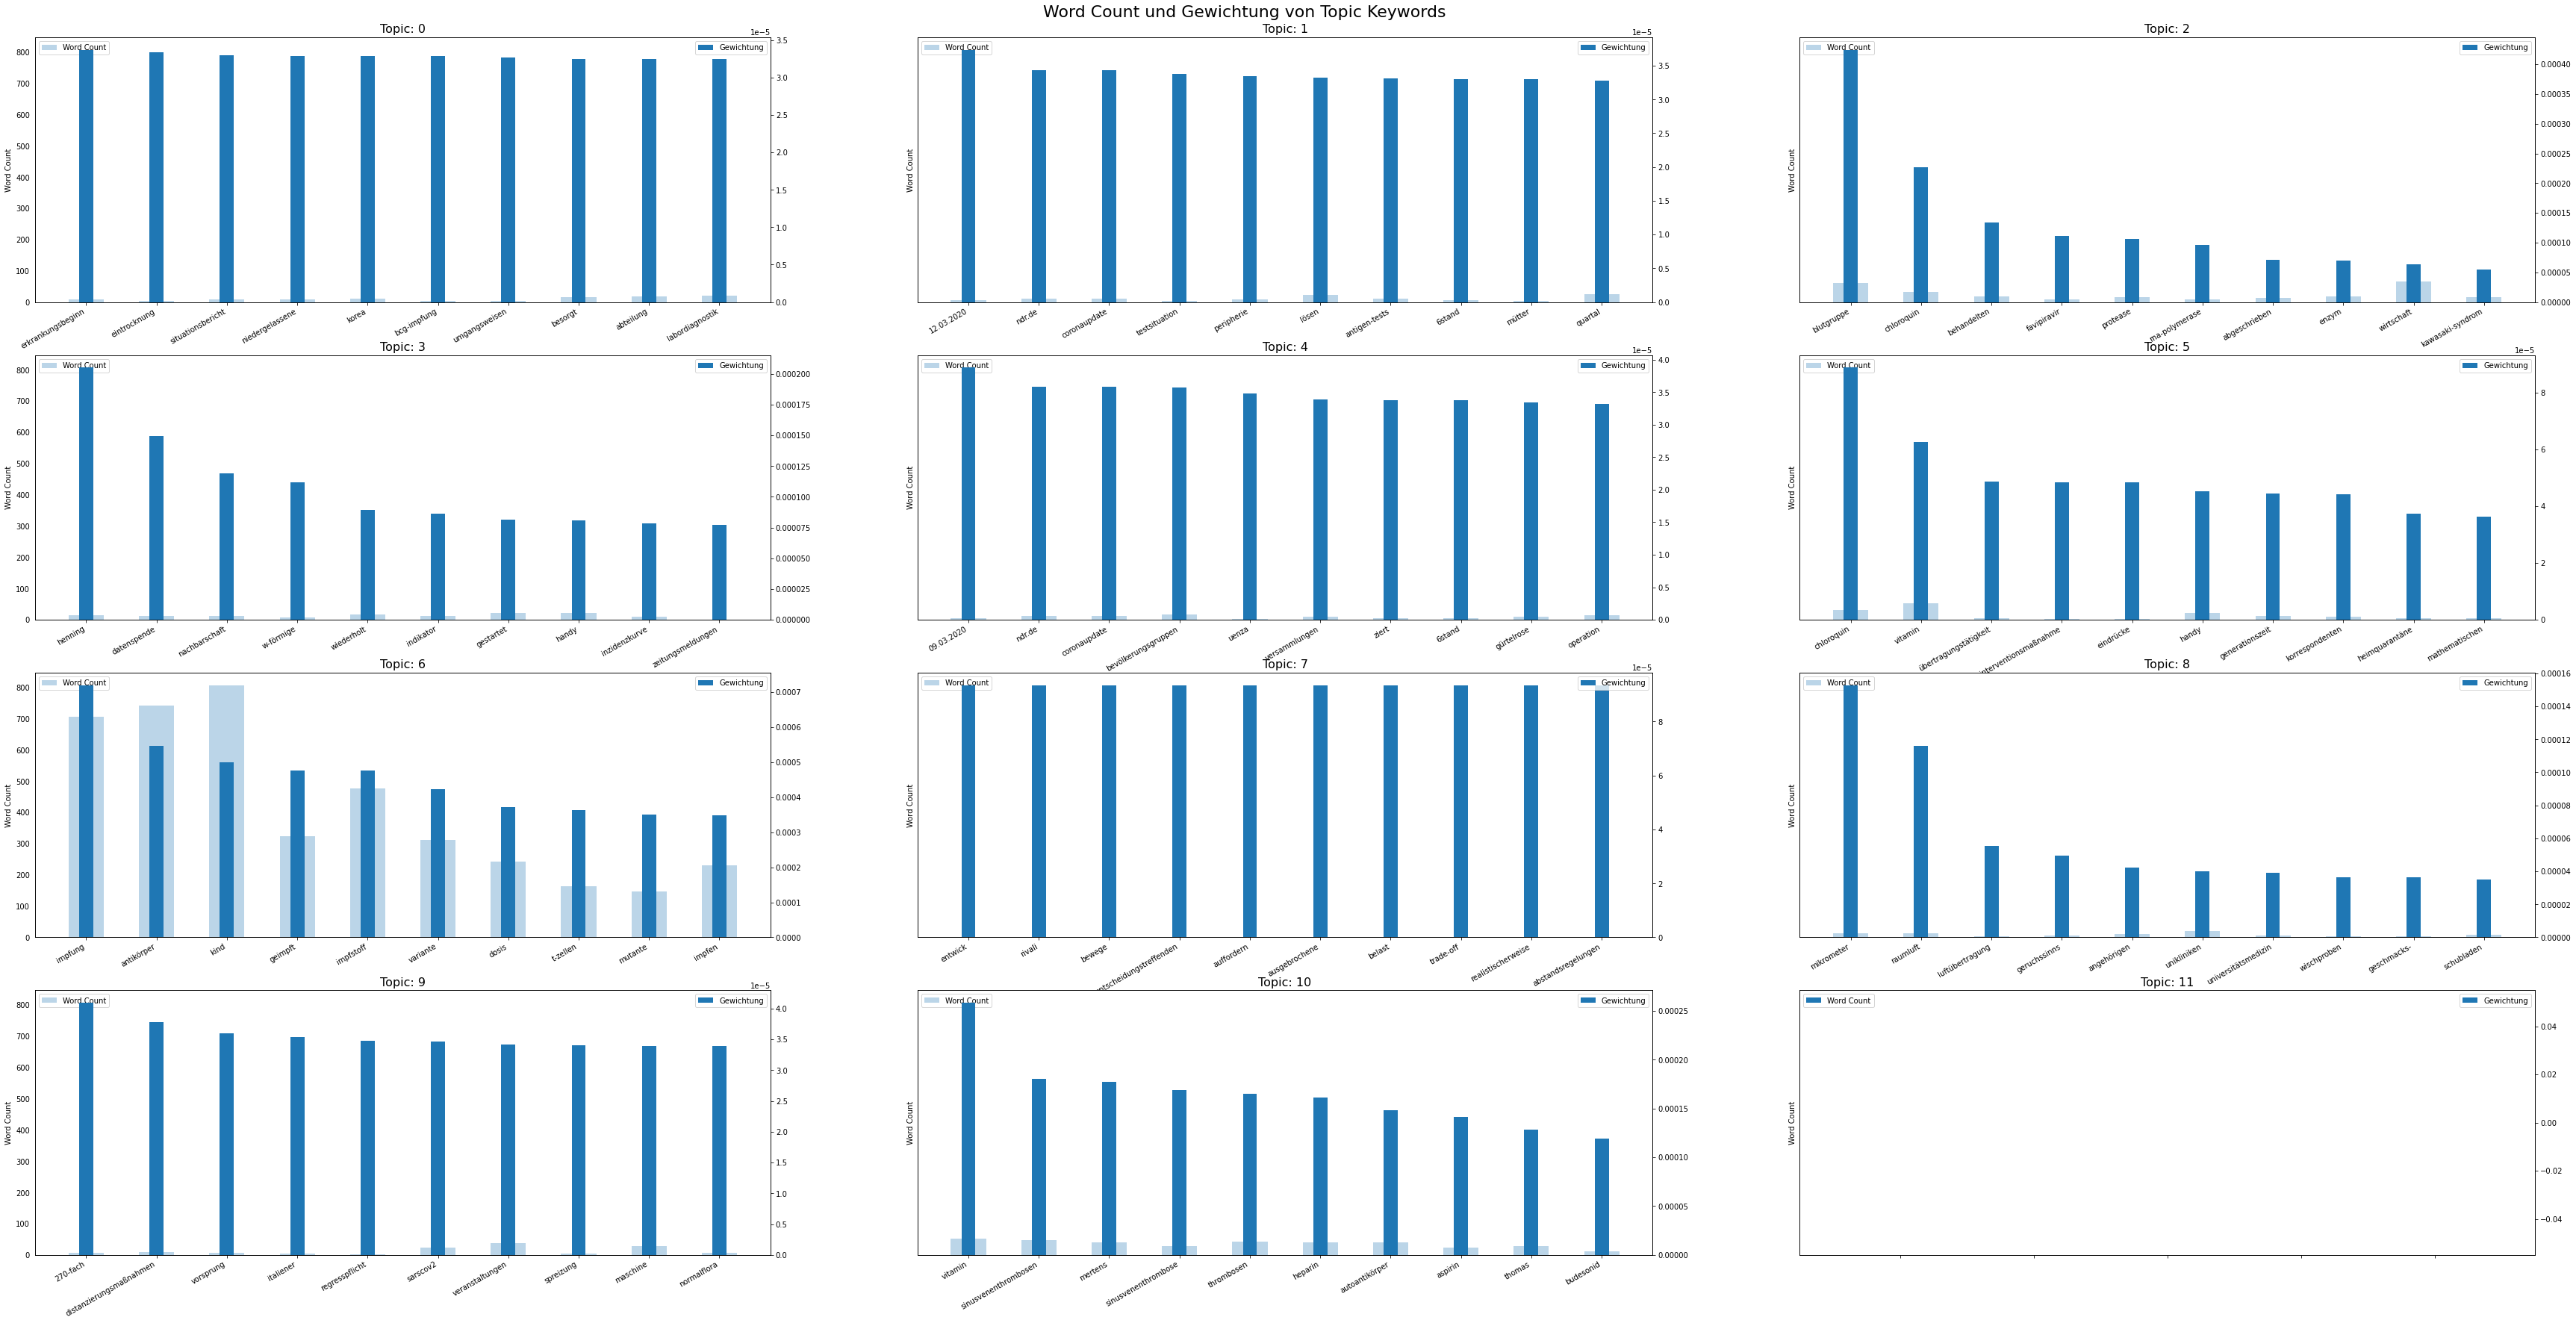

In [139]:
topics = ldamodel_tfidf.show_topics(formatted=False,num_topics=100)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
print(df)

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4,3, figsize=(60,30), sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Gewichtung')
    ax.set_ylabel('Word Count')
    # ax_twin.set_ylim(0, 4.0); 
    # ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
  
fig.suptitle('Word Count und Gewichtung von Topic Keywords', fontsize=22,y=0.9)    
plt.show()

In [123]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp] #, wordid_topics, wordid_phivalues
        # print(model[corp])
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return dominant_topics, topic_percentages

dominant_topics, topic_percentages = topics_per_document(model=ldamodel_tfidf, corpus=corpus, end=-1)            
# print(dominant_topics)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


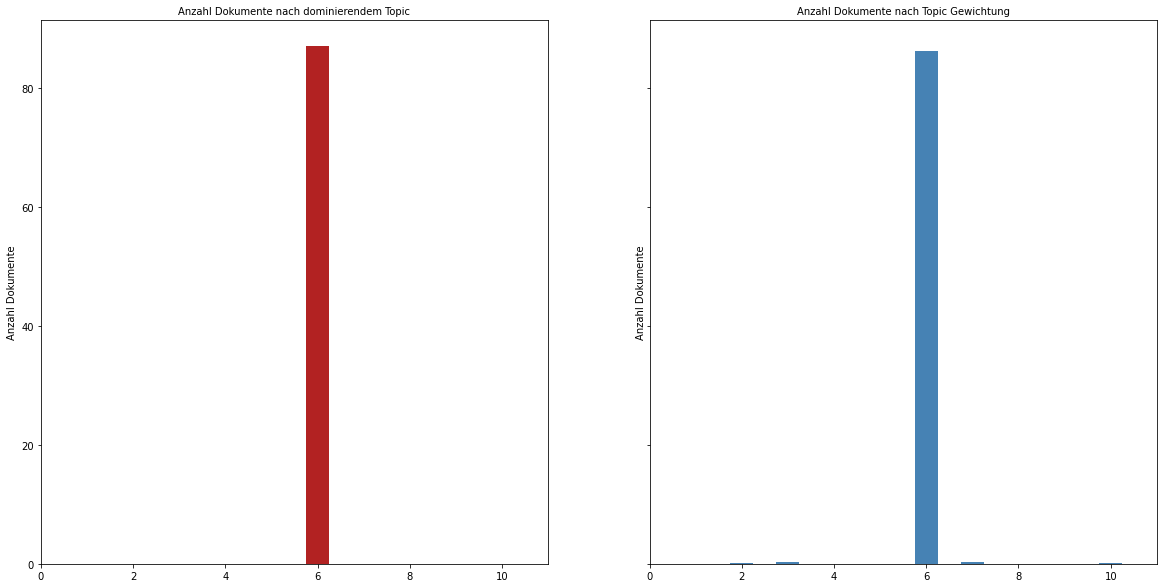

In [124]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_title('Anzahl Dokumente nach dominierendem Topic', fontdict=dict(size=10))
ax1.set_xlim(0,num_topics)
ax1.set_ylabel('Anzahl Dokumente')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_title('Topic-Verteilung nach Gewichtung ', fontdict=dict(size=10))
ax2.set_xlim(0,num_topics)
ax2.set_ylabel('Anzahl Dokumente')

plt.show()